# KNN Algoritması Tutorial
İmport Dataset

Dataset Tanımı

Dataset Görselleştirme

Knn algoritması açıklama

Knn with Sklearn


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data=pd.read_csv("KNN(kanser).csv")
#id ve unnamed kısmı analizimiz için işe yaramadığı için kaldırıyoruz
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)



In [19]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#malignant=M Kotu huylu tumor
#benign=B İyi huylu tumor

M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

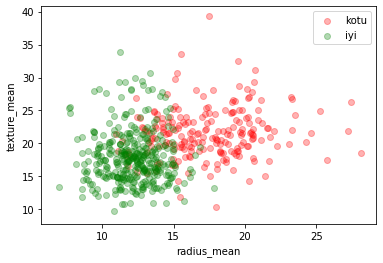

In [21]:
#scatter plot
#tumor yarıcapına ve tumor dokusuna göre x y ekseninde analiz yapalım
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [22]:
#sınıflandırma yaparken m ve b değerleri(iyi huylu kötü huylu) yerine
#int değerler kullanıyoruz hata almamak için.0 ve 1 kullanacağız
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)

In [23]:
#bu adımda normalizasyon yapacağız
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [24]:
#train test split
#verilerimizi eğitip test ediyoruz
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [25]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) #dosya içindeki resimde yaptığımız örnek gibi
knn.fit(x_train,y_train)
predection=knn.predict(x_test)



In [ ]:
#algoritmamız ne kadar doğru test skoruna bakalım
print(" {} nn score: {}".format(3,knn.score(x_test,y_test)))


# n_neigbors değerini nasıl seçmeliyiz ?
Biz burda bu değeri, 3 sectik ama max değeri bulmak için tek tek değerleri denemeliyiz

Bu işi kolaylaştırmak için aşagıdaki kodu inceliyelim

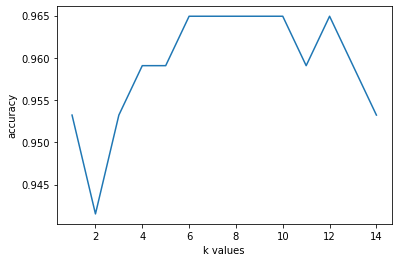

In [28]:
#fin k value
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()
    

Şekilde de görüldüğü üzere eğer k değeri=8 olunca

maximum verimi elde etmiş oluyoruz